In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
df = pd.read_csv('data/Sleep_Efficiency.csv')

# Drop rows with null values
df = df.dropna()

# Assuming 'data' is your DataFrame
#X = df[['Age', 'Caffeine consumption', 'Alcohol consumption','Exercise frequency']] 

df['Smoking status'] = df['Smoking status'].map({'Yes': 1, 'No': 0})



In [20]:
df

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,1,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,1,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,0,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,1,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,446,30,Female,2021-11-16 23:00:00,2021-11-16 06:30:00,7.5,0.53,28,20,52,4.0,50.0,2.0,1,1.0
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,0,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,0,3.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,0,3.0


In [22]:
X = df[['Age', 'Caffeine consumption', 'Alcohol consumption','Exercise frequency', 'Deep sleep percentage', 'REM sleep percentage', 'Light sleep percentage','Smoking status']] 
X

,Age,Caffeine consumption,Alcohol consumption,Exercise frequency,Deep sleep percentage,REM sleep percentage,Light sleep percentage,Smoking status
0,65,0.0,0.0,3.0,70,18,12,1
1,69,0.0,3.0,3.0,28,19,53,1
2,40,0.0,0.0,3.0,70,20,10,0
3,40,50.0,5.0,1.0,25,23,52,1
4,57,0.0,3.0,3.0,55,27,18,0
...,...,...,...,...,...,...,...,...
445,30,50.0,2.0,1.0,20,28,52,1
447,27,0.0,0.0,5.0,57,22,21,0
448,52,25.0,0.0,3.0,57,28,15,0
450,45,0.0,0.0,3.0,72,18,10,0


In [23]:
category_counts = df['Sleep efficiency'].value_counts().sort_index()
df['Efficiency Category'] = pd.qcut(df['Sleep efficiency'], q=2)

# Get the range of each bin
bin_ranges = df['Efficiency Category'].unique().sort_values()
print(bin_ranges)

[(0.499, 0.82], (0.82, 0.99]]
Categories (2, interval[float64, right]): [(0.499, 0.82] < (0.82, 0.99]]


In [24]:
bins = [0.499, 0.82, 0.99] # Define bins
labels = [0,1] # Define labels for the bins
df['Sleep efficiency class'] = pd.cut(df['Sleep efficiency'], bins=bins, labels=labels, include_lowest=True)

y = df['Sleep efficiency class'].astype(int)

In [25]:
y

0      1
1      0
2      1
3      0
4      0
      ..
445    0
447    1
448    0
450    0
451    0
Name: Sleep efficiency class, Length: 388, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)


In [30]:
#output size
num_classes = 2

#define model type as Sequential. Sequential groups a linear stack of layers
#define hidden layer: neurons= 32, activation= sigmoid
#define output layer: neurons= 10, activation= softmax

model = keras.Sequential()
model.add(keras.layers.Dense(units=32, activation='sigmoid', input_shape=(8,)))
model.add(keras.layers.Dense(units=num_classes, activation='softmax')) 


#model.add(keras.layers.Dense(units=12, activation='sigmoid', input_shape=(16,))) 
model.summary() #print the model architecture

/Users/wangrunge/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 354 (1.38 KB)

 Trainable params: 354 (1.38 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#model.compile(optimizer="sgd", 
        # loss='sparse_categorical_crossentropy', 
            #  metrics=['accuracy'])

In [32]:
history= model.fit(X_train, y_train, batch_size=10, epochs=250, validation_split=0.2)

Epoch 1/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5759 - loss: 0.7428 - val_accuracy: 0.6545 - val_loss: 0.6395
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5767 - loss: 0.7277 - val_accuracy: 0.6545 - val_loss: 0.6181
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5371 - loss: 0.7773 - val_accuracy: 0.6727 - val_loss: 0.6034
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6209 - loss: 0.6704 - val_accuracy: 0.6727 - val_loss: 0.5925
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6105 - loss: 0.6930 - val_accuracy: 0.6909 - val_loss: 0.5837
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6396 - loss: 0.6458 - val_accuracy: 0.6909 - val_loss: 0.5759
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6891 - loss: 0.6123 - val_accuracy: 0.6909 - val_loss: 0.5696
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5803 - loss: 0.6628 - val_accuracy: 0.7091 - v

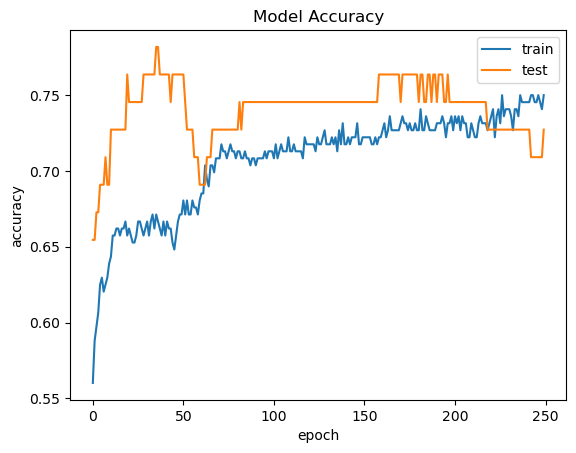

In [33]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

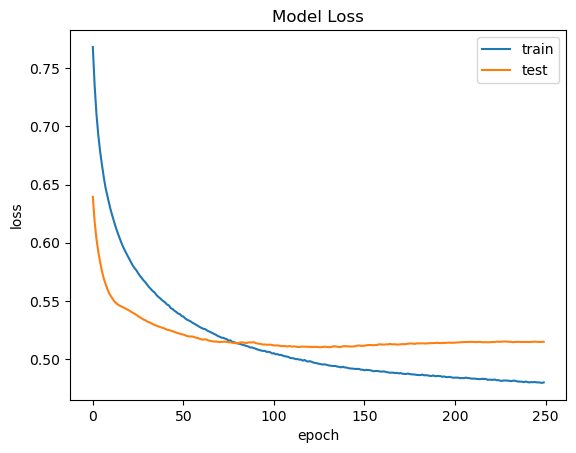

In [34]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [38]:
#Evaluate Model on test data
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7772 - loss: 0.4381 


[0.45838072896003723, 0.7606837749481201]

In [39]:
#confusion matrix
y_pred = model.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
cm

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[32, 23],
       [ 5, 57]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

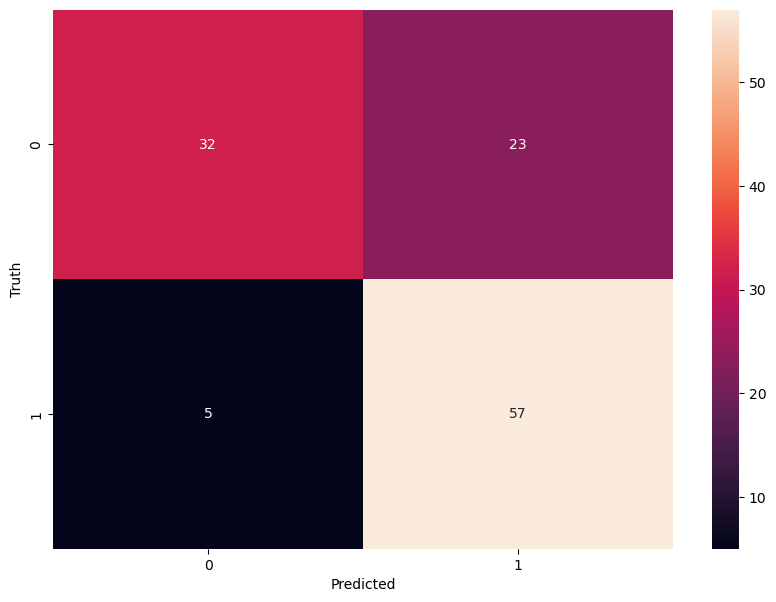

In [40]:
#plot confusion matrix with seaborn heatmap

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')